
<img src="../../img/ods_stickers.jpg">

## <center> [mlcourse.ai](https://mlcourse.ai) – открытый курс OpenDataScience по машинному обучению 
    
Автор материала: Екатерина Демидова, Data Scientist @ Segmento. Материал распространяется на условиях лицензии [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.
Автор материала: 

# <center>Домашнее задание № 2 (демо). <br> Визуальный анализ данных о публикациях на Хабрахабре</center>

**Заполните код в клетках и ответьте на вопросы в [веб-форме](https://docs.google.com/forms/d/1y8qj5iYpaVhczjWnZuHd5NRR_sdCGy3eTF5n-qPKknQ).**

In [1]:
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

## Загрузка и знакомство с данными

Для работы вам понадобятся предобработанные данные нашего учебного конкурса на kaggle [«Прогноз популярности статьи на Хабре»](https://www.kaggle.com/c/howpop-habrahabr-favs). Скачайте [данные](https://drive.google.com/file/d/1nV2qV9otN3LnVSDqy95hvpJdb6aWtATk/view?usp=sharing) соревнования (данные были удалены с Kaggle ради организации последующего идентичного соревнования, так что тут ссылка на Google Drive).

In [2]:
# при необходимости поменяйте путь к данным
df = pd.read_csv("../../data/habr_popularity_data/howpop_train.csv")

In [3]:
df.shape

(134137, 17)

In [5]:
df.head(3).T

,0,1,2
url,https://habrahabr.ru/post/18284/,https://habrahabr.ru/post/18285/,https://habrahabr.ru/post/18286/
domain,habrahabr.ru,habrahabr.ru,habrahabr.ru
post_id,18284,18285,18286
published,2008-01-01 18:19:00,2008-01-01 18:30:00,2008-01-01 18:34:00
author,@Tapac,@DezmASter,@DezmASter
flow,develop,design,design
polling,False,False,False
content_len,4305,7344,8431
title,Новогодний подарок блоггерам — WordPress 2.3.2,"Сумасшедшие яйца, или сервис для отслеживания ...","Сумасшедшие яйца, или сервис для отслеживания ..."
comments,0,1,47


Избавимся сразу от переменных, названия которых заканчиваются на `_lognorm` (нужны для соревнования на Kaggle). Выберем их с помощью `filter()` и удалим `drop`-ом:

In [3]:
df.drop(
    filter(lambda c: c.endswith("_lognorm"), df.columns),
    axis=1,  # axis = 1: столбцы
    inplace=True,
)  # избавляет от необходимости сохранять датасет

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
post_id,134137.0,181307.054265,81766.350702,18284.0,115565.0,182666.0,257401.0,314088.0
content_len,134137.0,7516.929699,8724.771640,1.0,2179.0,4949.0,9858.0,352471.0
comments,134137.0,39.625994,62.398958,0.0,7.0,19.0,48.0,2266.0
favs,134137.0,71.999866,145.854135,0.0,8.0,27.0,78.0,8718.0
views,134137.0,16631.013084,31479.819691,3.0,2100.0,7600.0,18700.0,1730000.0
votes_plus,133566.0,35.536888,42.461073,0.0,11.0,22.0,45.0,1466.0
votes_minus,133566.0,8.050035,11.398282,0.0,2.0,5.0,10.0,445.0


In [22]:
df.sort_values(by = "votes_plus", ascending=False).head(10)


,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus
45258,https://geektimes.ru/post/257030/,geektimes.ru,257030,2011-11-27 23:21:00,@kfedorov,NaN,False,5886,Делаем приватный монитор из старого LCD монитора,319,3360,456000,1466.0,18.0
15130,https://habrahabr.ru/post/70330/,habrahabr.ru,70330,2009-09-23 13:17:00,@mobilz,develop,False,10267,Были получены исходники 3300 глобальных интерн...,907,906,201000,1190.0,36.0
39477,https://geektimes.ru/post/124363/,geektimes.ru,124363,2011-07-18 12:23:00,@PapaBubaDiop,NaN,False,22251,История игрушки. Поле Чудес,295,666,137000,923.0,10.0
73072,https://habrahabr.ru/company/roem/blog/193488/,habrahabr.ru,193488,2013-09-12 14:37:00,NaN,misc,True,10903,Как Денис Крючков выкупил Хабр у Mail.ru,335,413,254000,817.0,35.0
42911,https://geektimes.ru/post/129839/,geektimes.ru,129839,2011-10-06 03:50:00,@Mairon,NaN,False,5706,Стив Джобс умер,648,111,20800,783.0,75.0
71543,https://geektimes.ru/post/189328/,geektimes.ru,189328,2013-08-07 17:07:00,@veveve,NaN,False,16097,"Воронежец заключил с банком договор, внеся сво...",859,457,34000,778.0,25.0
80001,https://habrahabr.ru/company/mosigra/blog/211580/,habrahabr.ru,211580,2014-02-17 09:30:00,NaN,misc,False,12884,За что конкретно я ненавижу некоторых отдельно...,775,1168,555000,769.0,45.0
71681,https://geektimes.ru/post/189706/,geektimes.ru,189706,2013-08-11 16:02:00,@guessss_who,NaN,False,27403,Дети не умеют пользоваться компьютерами… И вот...,835,1588,42500,756.0,82.0
41811,https://habrahabr.ru/post/128125/,habrahabr.ru,128125,2011-09-09 21:40:00,@ArtemSmirnov,misc,False,650,Топик якобы из песочницы,179,67,6600,724.0,39.0
65129,https://habrahabr.ru/post/278827/,habrahabr.ru,278827,2013-03-04 00:58:00,@devaka,develop,False,3242,Жизнь разработчика (в картинках),131,3438,28200,700.0,184.0


In [23]:
df.describe(include=["object", "bool"]).T  # бинарные и категориальные переменные

,count,unique,top,freq
url,134137,134137,https://habrahabr.ru/post/18284/,1
domain,134137,2,habrahabr.ru,97048
published,134137,130291,2011-06-14 15:52:00,39
author,97657,22077,@alizar,5292
flow,97048,6,develop,53318
polling,134137,2,False,129412
title,134137,133628,"Интересные события, произошедшие в выходные",56


In [5]:
# настройка внешнего вида графиков в seaborn
sns.set_style("dark")
sns.set_palette("RdBu")
sns.set_context(
    "notebook", font_scale=1.5, rc={"figure.figsize": (15, 5), "axes.titlesize": 18}
)

Столбец **`published`** (время публикации) содержит строки. Чтобы мы могли работать с этими данными как с датой/временем публикации, приведём их к типу `datetime`:

In [6]:
print(df.published.dtype)
df["published"] = pd.to_datetime(df.published, yearfirst=True)
print(df.published.dtype)

object
datetime64[ns]


Создадим несколько столбцов на основе данных о времени публикации:

In [7]:
df["year"] = [d.year for d in df.published]
df["month"] = [d.month for d in df.published]

df["dayofweek"] = [d.isoweekday() for d in df.published]
df["hour"] = [d.hour for d in df.published]

In [75]:
df["day"] = [d.day for d in df.published]

In [76]:
df.head()

,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus,year,month,dayofweek,hour,day
0,https://habrahabr.ru/post/18284/,habrahabr.ru,18284,2008-01-01 18:19:00,@Tapac,develop,False,4305,Новогодний подарок блоггерам — WordPress 2.3.2,0,0,236,0.0,0.0,2008,1,2,18,1
1,https://habrahabr.ru/post/18285/,habrahabr.ru,18285,2008-01-01 18:30:00,@DezmASter,design,False,7344,"Сумасшедшие яйца, или сервис для отслеживания ...",1,1,353,1.0,0.0,2008,1,2,18,1
2,https://habrahabr.ru/post/18286/,habrahabr.ru,18286,2008-01-01 18:34:00,@DezmASter,design,False,8431,"Сумасшедшие яйца, или сервис для отслеживания ...",47,72,1200,45.0,5.0,2008,1,2,18,1
3,https://habrahabr.ru/post/18291/,habrahabr.ru,18291,2008-01-02 01:32:00,@Taoorus,design,False,5662,"Сглаживание шрифтов, и субпиксельная отрисовка",102,36,5700,72.0,3.0,2008,1,3,1,2
4,https://geektimes.ru/post/18294/,geektimes.ru,18294,2008-01-02 14:34:00,@dennydo,NaN,False,3706,Почему мне не нравится iPhone,230,6,1400,73.0,15.0,2008,1,3,14,2


-----
Теперь Ваша очередь. В каждом пункте предлагается построить картинку и с ее помощью ответить на вопрос в [форме](https://docs.google.com/forms/d/e/1FAIpQLSf3b5OG8zX_nLQBQ-t20c6M5Auz-VUL-yxj8Fm9_o_XWDBTrg/viewform?c=0&w=1). Конечно, можно попытаться ответить на все вопросы только с Pandas, без картинок, но мы советуем Вам потренироваться строить (красивые) визуализации.   

## 1\. В каком месяце (и какого года) было больше всего публикаций?

* март 2016
* март 2015
* апрель 2015
* апрель 2016

In [8]:
%config InlineBackend.figure_format = 'svg'

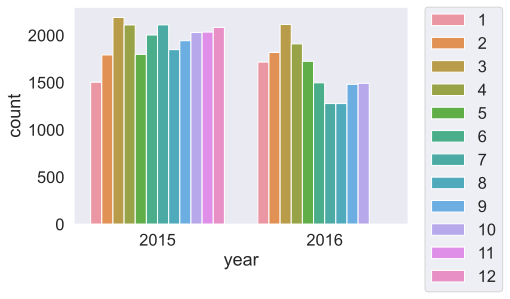

In [13]:
sns.countplot(x = "year", hue = "month", data = df[(df["year"] > 2014) ], orient = "v");
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0);

## 2\. Проанализируйте публикации в месяце из предыдущего вопроса

Выберите один или несколько вариантов:

* Один или несколько дней сильно выделяются из общей картины
* На хабре _всегда_ больше статей, чем на гиктаймсе
* По субботам на гиктаймс и на хабрахабр публикуют примерно одинаковое число статей

Подсказки: постройте график зависимости числа публикаций от дня; используйте параметр `hue`; не заморачивайтесь сильно с ответами и не ищите скрытого смысла :)

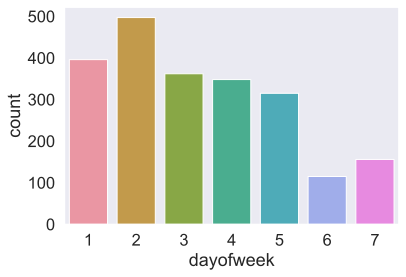

In [17]:
sns.countplot(x = "dayofweek", data =df[(df["year"] == 2015)&(df["month"] == 3)] );

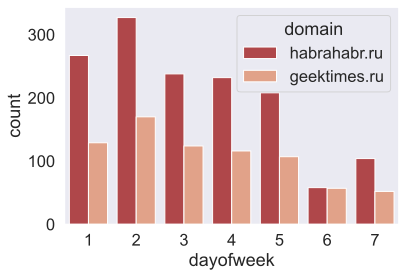

In [78]:
sns.countplot( x = "dayofweek", hue = "domain", data =df[(df["year"] == 2015)&(df["month"] == 3)]);

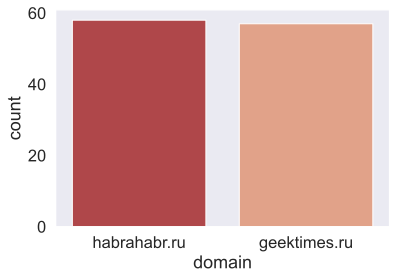

In [21]:
sns.countplot( x = "domain", data =df[(df["year"] == 2015)&(df["month"] == 3)&(df["dayofweek"] == 6)]);

## 3\. Когда лучше всего публиковать статью?

* Больше всего просмотров набирают статьи, опубликованные в 12 часов дня
* У опубликованных в 10 утра постов больше всего комментариев
* Больше всего просмотров набирают статьи, опубликованные в 6 часов утра
* Максимальное число комментариев на гиктаймсе набрала статья, опубликованная в 9 часов вечера
* На хабре дневные статьи комментируют чаще, чем вечерние

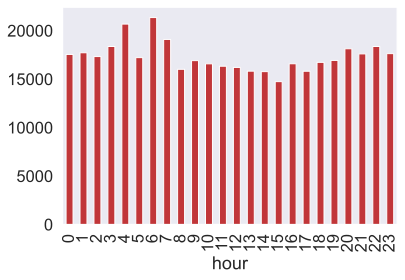

In [74]:
df.groupby(["hour"])["views"].mean().plot(kind="bar");


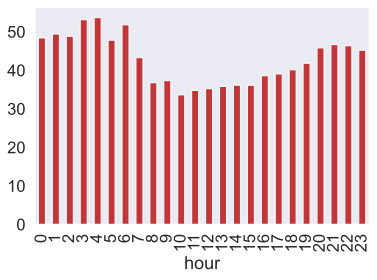

In [72]:
df.groupby(["hour"])["comments"].mean().plot(kind = "bar");

In [13]:
indx = df[df["domain"] == "geektimes.ru"]["comments"].sort_values(ascending=False).head().index.values


In [22]:
df.loc[indx, ("comments", "hour")]

,comments,hour
38763,2266,2
65285,1887,20
38742,1829,17
126328,1578,21
127407,1214,12


<AxesSubplot:xlabel='hour', ylabel='comments'>

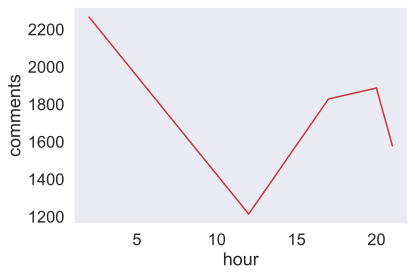

In [30]:
sns.lineplot(x ="hour", y = "comments", data = df.loc[indx, ("comments", "hour")])

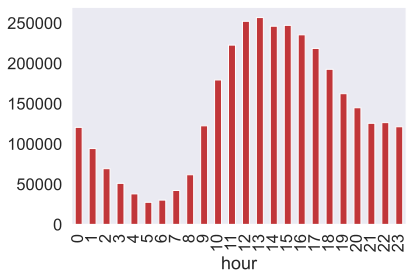

In [31]:
df[df["domain"] == "habrahabr.ru"].groupby(["hour"])["comments"].sum().plot(kind = "bar");

## 4\. Кого из топ-20 авторов чаще всего минусуют?

* @Mordatyj
* @Mithgol
* @alizar
* @ilya42

In [96]:
 top_20_names = df["author"].value_counts().head(20).index.values

In [97]:
 top_20_names

array(['@alizar', '@marks', '@SLY_G', '@ivansychev', '@semen_grinshtein',
       '@jeston', '@aleksandrit', '@XaocCPS', '@Mithgol', '@Mordatyj',
       '@Shapelez', '@ilya42', '@atomlib', '@ragequit', '@Tylerskald',
       '@andorro', '@jasiejames', '@lozga', '@Sterhel', '@Jeditobe'],
      dtype=object)

In [112]:
df[df['author'].isin( top_20_names)].groupby(["author"])['votes_minus'].mean().sort_values(ascending = False)

author
@Mithgol             20.481081
@Jeditobe            16.491713
@XaocCPS             15.286913
@andorro             13.654676
@aleksandrit          9.974643
@Sterhel              9.350785
@alizar               7.928191
@Mordatyj             7.471455
@ilya42               6.216797
@Tylerskald           5.518519
@Shapelez             5.196998
@jeston               4.831917
@atomlib              4.407982
@SLY_G                4.276947
@ragequit             4.018018
@marks                3.834997
@ivansychev           2.498519
@lozga                2.420000
@jasiejames           1.516432
@semen_grinshtein     1.167378
Name: votes_minus, dtype: float64

In [87]:
top_20 = df.groupby(["author"])["votes_plus", "votes_minus"].sum().sort_values(by = ["votes_plus"], ascending=False).head(20)

C:\Users\Marina\AppData\Local\Temp\ipykernel_3268\608481938.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  top_20 = df.groupby(["author"])["votes_plus", "votes_minus"].sum().sort_values(by = ["votes_plus"], ascending=False).head(20)


In [88]:
top_20

,votes_plus,votes_minus
author,,
@alizar,235440.0,41734.0
@marks,117945.0,18059.0
@SLY_G,43174.0,8293.0
@ilya42,30885.0,3183.0
@jeston,29755.0,5117.0
@Mithgol,29150.0,11367.0
@aleksandrit,27230.0,6294.0
@XaocCPS,23376.0,9111.0
@ivansychev,22794.0,3373.0


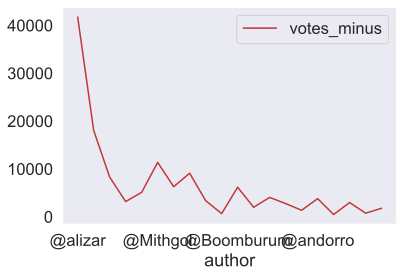

In [51]:
top_20[["votes_minus"]].plot();

## 5\. Сравните субботы и понедельники

Правда ли, что по субботам авторы пишут в основном днём, а по понедельникам — в основном вечером?

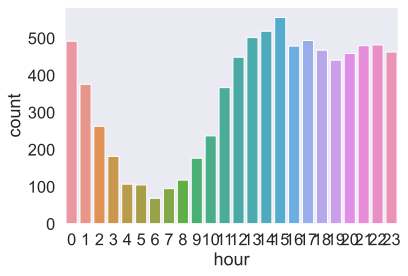

In [57]:
sns.countplot(x = "hour", data = df[df["dayofweek"] == 6]);


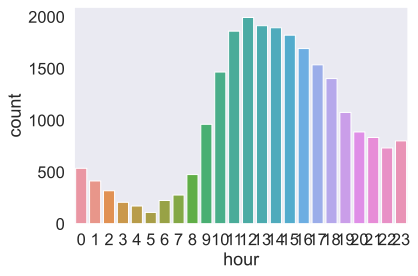

In [58]:
sns.countplot(x = "hour", data = df[df["dayofweek"] == 1]);